## 1. Check dataset

In [266]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [267]:
data_dir = "../DataSet/BeadSegmentation/original_data/"
data_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
data_df.head()

,ImageId,MaskId
0,20230930_21h03m03s_B01_1.png,20230930_21h03m03s_B01_1_mask.png
1,20230930_21h03m03s_B01_2.png,20230930_21h03m03s_B01_2_mask.png
2,20230930_21h03m06s_B02_1.png,20230930_21h03m06s_B02_1_mask.png
3,20230930_21h03m06s_B02_2.png,20230930_21h03m06s_B02_2_mask.png
4,20230930_21h03m06s_B02_3.png,20230930_21h03m06s_B02_3_mask.png


In [268]:
def extract_bead_id(x):
    return x.split(".")[0]

In [269]:
data_df["Id"] = data_df.ImageId.apply(lambda x:extract_bead_id(x))
data_df

,ImageId,MaskId,Id
0,20230930_21h03m03s_B01_1.png,20230930_21h03m03s_B01_1_mask.png,20230930_21h03m03s_B01_1
1,20230930_21h03m03s_B01_2.png,20230930_21h03m03s_B01_2_mask.png,20230930_21h03m03s_B01_2
2,20230930_21h03m06s_B02_1.png,20230930_21h03m06s_B02_1_mask.png,20230930_21h03m06s_B02_1
3,20230930_21h03m06s_B02_2.png,20230930_21h03m06s_B02_2_mask.png,20230930_21h03m06s_B02_2
4,20230930_21h03m06s_B02_3.png,20230930_21h03m06s_B02_3_mask.png,20230930_21h03m06s_B02_3
5,20230930_21h03m06s_B02_4.png,20230930_21h03m06s_B02_4_mask.png,20230930_21h03m06s_B02_4
6,20230930_21h03m09s_B03_1.png,20230930_21h03m09s_B03_1_mask.png,20230930_21h03m09s_B03_1
7,20230930_21h03m09s_B03_2.png,20230930_21h03m09s_B03_2_mask.png,20230930_21h03m09s_B03_2
8,20230930_21h03m09s_B03_3.png,20230930_21h03m09s_B03_3_mask.png,20230930_21h03m09s_B03_3
9,20230930_21h03m09s_B03_4.png,20230930_21h03m09s_B03_4_mask.png,20230930_21h03m09s_B03_4


In [270]:
bead_ids = np.unique(data_df.Id.values)
len(bead_ids)

48

In [271]:
def get_bead_data(data_df, index):
    client_ids = np.unique(data_df.Id.values)
    client_id = client_ids[index]
    client_data = data_df[data_df.Id == client_id]
    image_files = list(client_data["ImageId"])
    mask_files = list(client_data["MaskId"])
    return client_id, image_files, mask_files

In [272]:
index = 0
get_bead_data(data_df, index)

('20230930_21h03m03s_B01_1',
 ['20230930_21h03m03s_B01_1.png'],
 ['20230930_21h03m03s_B01_1_mask.png'])

In [273]:
regions = ["background", "bead"]
colors = ((0,0,0), (255, 255, 255))



In [274]:
def display_bead_dataset(data_df, data_dir, regions, colors, index=0, image_size=448, wait_time=10000):
    bead_id, image_files, mask_files = get_bead_data(data_df, index)

    canvas = np.zeros(shape=(image_size, 2*image_size+50, 3), dtype=np.uint8)
    window_name = 'Bead DataSet'
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)

    for i in range(len(image_files)):
        image = cv2.imread(os.path.join(data_dir, "images", image_files[i]))
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(os.path.join(data_dir, "masks", mask_files[i]))
        if mask is None:
            continue
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        
        grid_pad = 50
        canvas[:, :image_size, :] = image
        canvas[:, image_size+grid_pad:2*image_size+grid_pad, :] = mask
        
        text_buff = 210
        for j in range(1, len(regions)):
            cv2.putText(canvas, f'{regions[j].upper()}', (900, text_buff), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[j], 2)
            text_buff += 40
        
        cv2.imshow(window_name, canvas)
        key = cv2.waitKey(wait_time)
        if key == 27:  # ESC key
            break
        if cv2.getWindowProperty(window_name, cv2.WND_PROP_VISIBLE) < 1:  
            break

    cv2.destroyAllWindows()

# This function encapsulates the updated display mechanism. 
# It checks for the ESC key and window close event to exit. 
# Function calls are commented out to prevent execution at this stage.


In [275]:
# display_bead_dataset(data_df, data_dir, ["region1", "region2"], [(255,0,0), (0,255,0)], index=0, image_size=448, wait_time=10000)

In [276]:
mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [277]:
np.unique(mask)

array([  0, 255], dtype=uint8)

## 2. Build tensor module

In [278]:
IMAGE_SIZE = 224    # U-net input image size: 224*224

In [279]:
import os
import shutil
import cv2
import numpy as np
import torch
from sklearn.model_selection import train_test_split

class bead_dataset():
    def __init__(self, data_dir, phase, transformer=None, split_ratio=0.1):
        self.phase = phase
        self.root_dir = data_dir
        self.data_dir = os.path.join(data_dir, "origianl_data")  # 원본 데이터 폴더
        self.images_dir = os.path.join(data_dir, phase, "images")
        self.masks_dir = os.path.join(data_dir, phase, "masks")

        # 원본 데이터 폴더 확인 및 train/val 데이터 폴더 생성
        self.prepare_data_folders(split_ratio)
        
        # 이미지와 마스크 파일 목록 로드
        self.image_files = [filename for filename in os.listdir(self.images_dir) if filename.endswith("png")]
        self.mask_files = [filename for filename in os.listdir(self.masks_dir) if filename.endswith("png")]
        assert len(self.image_files) == len(self.mask_files), "The number of images and masks must be the same."

        self.transformer = transformer

    def prepare_data_folders(self, split_ratio):
        original_images = [f for f in os.listdir(os.path.join(self.data_dir, "images")) if f.endswith('png')]
        original_masks = [f for f in os.listdir(os.path.join(self.data_dir, "masks")) if f.endswith('png')]

        # 데이터 분할
        train_images, val_images = train_test_split(original_images, test_size=split_ratio, random_state=42)

        # 폴더 경로 설정
        train_images_dir = os.path.join(self.root_dir, "train", "images")
        train_masks_dir = os.path.join(self.root_dir, "train", "masks")
        val_images_dir = os.path.join(self.root_dir, "val", "images")
        val_masks_dir = os.path.join(self.root_dir, "val", "masks")

        # 필요한 경우 폴더 생성
        for directory in [train_images_dir, train_masks_dir, val_images_dir, val_masks_dir]:
            os.makedirs(directory, exist_ok=True)
        
        # 이미지와 마스크 파일 복사
        for img_list, img_dir, mask_dir in [(train_images, train_images_dir, train_masks_dir), (val_images, val_images_dir, val_masks_dir)]:
            for img in img_list:
                shutil.copy(os.path.join(self.data_dir, "images", img), img_dir)
                
                # 마스크 파일명 추정 및 복사
                mask_name = img[:-4] + '_mask.png'
                if mask_name in original_masks:
                    shutil.copy(os.path.join(self.data_dir, "masks", mask_name), mask_dir)
                else:
                    print(f"Warning: No matching mask file found for {img}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        image = cv2.imread(os.path.join(self.images_dir, self.image_files[index]))
        image = cv2.resize(image, dsize=(IMAGE_SIZE,IMAGE_SIZE), interpolation=cv2.INTER_LINEAR)
        mask = cv2.imread(os.path.join(self.masks_dir, self.mask_files[index]))
        mask = cv2.resize(mask, dsize=(IMAGE_SIZE,IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        mask[mask < 240] = 0
        mask[mask >= 240] = 255
        mask = mask / 255

        mask_H, mask_W, mask_C = mask.shape
        background = np.ones((mask_H, mask_W))
        background[mask[...,0] != 0] = 0
        background[mask[...,1] != 0] = 0
        background[mask[...,2] != 0] = 0
        mask = np.concatenate([np.expand_dims(background, -1), mask], axis=-1)
        mask = np.argmax(mask, axis=-1)

        if self.transformer:
            image = self.transformer(image)
        target = torch.from_numpy(mask).long()
        return image, target


In [280]:
data_dir = "../DataSet/BeadSegmentation/"
dset = bead_dataset(data_dir, "train")

In [281]:
dset[0]

(array([[[165, 173, 164],
         [168, 184, 174],
         [168, 186, 169],
         ...,
         [255, 255, 239],
         [254, 254, 233],
         [253, 253, 230]],
 
        [[163, 174, 167],
         [165, 183, 174],
         [169, 186, 173],
         ...,
         [255, 255, 248],
         [255, 255, 244],
         [254, 255, 242]],
 
        [[170, 182, 168],
         [171, 184, 168],
         [171, 186, 168],
         ...,
         [255, 255, 252],
         [255, 255, 253],
         [253, 254, 250]],
 
        ...,
 
        [[117, 126, 123],
         [115, 127, 128],
         [113, 126, 127],
         ...,
         [255, 255, 244],
         [255, 255, 241],
         [255, 255, 238]],
 
        [[119, 122, 119],
         [117, 123, 122],
         [114, 125, 124],
         ...,
         [254, 254, 239],
         [254, 255, 239],
         [254, 255, 235]],
 
        [[123, 126, 118],
         [120, 127, 118],
         [116, 127, 119],
         ...,
         [253, 254, 236],
  

In [282]:
from torchvision import transforms

def build_transformer():
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229, 0.224, 0.225])
    ])
    return transformer

In [283]:
transformer = build_transformer()
dset = bead_dataset(data_dir=data_dir, phase="train", transformer=transformer)

In [284]:
dset[0]

(tensor([[[ 0.7077,  0.7591,  0.7591,  ...,  2.2489,  2.2318,  2.2147],
          [ 0.6734,  0.7077,  0.7762,  ...,  2.2489,  2.2489,  2.2318],
          [ 0.7933,  0.8104,  0.8104,  ...,  2.2489,  2.2489,  2.2147],
          ...,
          [-0.1143, -0.1486, -0.1828,  ...,  2.2489,  2.2489,  2.2489],
          [-0.0801, -0.1143, -0.1657,  ...,  2.2318,  2.2318,  2.2318],
          [-0.0116, -0.0629, -0.1314,  ...,  2.2147,  2.2318,  2.2318]],
 
         [[ 0.9930,  1.1856,  1.2206,  ...,  2.4286,  2.4111,  2.3936],
          [ 1.0105,  1.1681,  1.2206,  ...,  2.4286,  2.4286,  2.4286],
          [ 1.1506,  1.1856,  1.2206,  ...,  2.4286,  2.4286,  2.4111],
          ...,
          [ 0.1702,  0.1877,  0.1702,  ...,  2.4286,  2.4286,  2.4286],
          [ 0.1001,  0.1176,  0.1527,  ...,  2.4111,  2.4286,  2.4286],
          [ 0.1702,  0.1877,  0.1877,  ...,  2.4111,  2.4111,  2.4111]],
 
         [[ 1.0539,  1.2282,  1.1411,  ...,  2.3611,  2.2566,  2.2043],
          [ 1.1062,  1.2282,

In [285]:
def collate_fn(batch):
    images = []
    targets = []
    for a, b in batch:
        images.append(a)
        targets.append(b)
    images = torch.stack(images, dim=0)
    targets = torch.stack(targets, dim=0)
    return images, targets

In [286]:
image, target = dset[0]
print(f"image shape: {image.shape}")
print(f"target shape: {target.shape}")

image shape: torch.Size([3, 224, 224])
target shape: torch.Size([224, 224])


In [287]:
from torch.utils.data import DataLoader

In [288]:
dloader = DataLoader(dset, batch_size=4, shuffle=True, collate_fn=collate_fn)

In [289]:
for index, batch in enumerate(dloader):
    images = batch[0]
    targets = batch[1]
    print(f"images shape: {images.shape}")
    print(f"targets shape: {targets.shape}")
    
    if index == 0:
        break

images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])


In [290]:
def build_dataloader(data_dir, batch_size=4):
    transformer = build_transformer()
    
    dataloaders = {}
    train_dataset = bead_dataset(data_dir=data_dir, phase="train", transformer=transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)   # 16,000여개 데이터 중 앞 120개 데이터만 사용하기 위해 Shuffle을 하지 않음(Segmentation code와 차이점)
    
    val_dataset = bead_dataset(data_dir=data_dir, phase="val", transformer=transformer)
    dataloaders["val"] = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    return dataloaders

In [291]:
dataloaders = build_dataloader(data_dir=data_dir) # 기본 batch 크기 4
# dataloaders = build_dataloader(data_dir=data_dir, batch_size=6) # batch 크기 6

for phase in ["train", "val"]:
    for index, batch in enumerate(dataloaders[phase]):
        images = batch[0]
        targets = batch[1]
        print(f"images shape: {images.shape}")
        print(f"targets shape: {targets.shape}")
        
        if index == 0:
            break

images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])
images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])


## 3. U-Net based on VGG16 backbone

In [292]:
import torch.nn as nn
from torchvision import transforms, models

In [293]:
def ConvLayer(in_channels, out_channels, kernel_size=3, padding=1):
    layers = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=padding),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    )
    return layers

def UpConvLayer(in_channels, out_channels):
    layers = nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )
    return layers

In [294]:
vgg16 = models.vgg16_bn(pretrained=False)
vgg16

/home/club8080/.pyenv/versions/3.11.5/envs/my_proj_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/club8080/.pyenv/versions/3.11.5/envs/my_proj_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [295]:
class Encoder(nn.Module):
    def __init__(self, pretrained):
        super().__init__()
        backbone = models.vgg16_bn(pretrained=pretrained).features
        self.conv_block1 = nn.Sequential(*backbone[:6])
        self.conv_block2 = nn.Sequential(*backbone[6:13])
        self.conv_block3 = nn.Sequential(*backbone[13:20])
        self.conv_block4 = nn.Sequential(*backbone[20:27])
        self.conv_block5 = nn.Sequential(*backbone[27:34], 
                                         ConvLayer(512, 1024, kernel_size=1, padding=0))

    def forward(self, x):
        encode_features = []
        out = self.conv_block1(x)
        encode_features.append(out)
        
        out = self.conv_block2(out)
        encode_features.append(out)
        
        out = self.conv_block3(out)
        encode_features.append(out)
        
        out = self.conv_block4(out)
        encode_features.append(out)
        
        out = self.conv_block5(out)
        return out, encode_features

In [296]:
# dummy encoder test

encoder = Encoder(pretrained=False)
x = torch.randn(1, 3, 224, 224)
out, ftrs = encoder(x)

In [297]:
# feature 확인

for ftr in ftrs:
    print(ftr.shape)
print(out.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 1024, 14, 14])


In [298]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.upconv_layer1 = UpConvLayer(in_channels=1024, out_channels=512)
        self.conv_block1 = ConvLayer(in_channels=512+512, out_channels=512)
        
        self.upconv_layer2 = UpConvLayer(in_channels=512, out_channels=256)
        self.conv_block2 = ConvLayer(in_channels=256+256, out_channels=256)
        
        self.upconv_layer3 = UpConvLayer(in_channels=256, out_channels=128)
        self.conv_block3 = ConvLayer(in_channels=128+128, out_channels=128)
        
        self.upconv_layer4 = UpConvLayer(in_channels=128, out_channels=64)
        self.conv_block4 = ConvLayer(in_channels=64+64, out_channels=64)
        
    def forward(self, x, encoder_features):     # encoder의 feature가 함께 입력값으로 들어감
        out = self.upconv_layer1(x)
        out = torch.cat([out, encoder_features[-1]], dim=1)
        out = self.conv_block1(out)
        
        out = self.upconv_layer2(out)
        out = torch.cat([out, encoder_features[-2]], dim=1)
        out = self.conv_block2(out)
        
        out = self.upconv_layer3(out)
        out = torch.cat([out, encoder_features[-3]], dim=1)
        out = self.conv_block3(out)
        
        out = self.upconv_layer4(out)
        out = torch.cat([out, encoder_features[-4]], dim=1)
        out = self.conv_block4(out)
        return out

In [299]:
# dummy test

encoder = Encoder(pretrained=False)
decoder = Decoder()
x = torch.randn(1, 3, 224, 224)
out, ftrs = encoder(x)
out = decoder(out, ftrs)

In [300]:
print(out.shape)

torch.Size([1, 64, 224, 224])


In [301]:
class UNet(nn.Module):
    def __init__(self, num_classes, pretrained):
        super().__init__()
        self.encoder = Encoder(pretrained)
        self.decoder = Decoder()
        self.head = nn.Conv2d(64, num_classes, kernel_size=1, padding=0)
        
    def forward(self, x):
        out, encode_features = self.encoder(x)
        out = self.decoder(out, encode_features)
        out = self.head(out)
        return out

In [302]:
# dummy test
model = UNet(num_classes=4, pretrained=False)
x = torch.randn(1, 3, 224, 224)
out = model(x)

In [303]:
print(out.shape)

torch.Size([1, 4, 224, 224])


## 4. Semantic segmentation Loss and train code

In [304]:
import torch.nn.functional as F         # Loss 함수 구현을 위해 필요

In [305]:
class UNet_metric():
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.CE_loss = nn.CrossEntropyLoss(reduction="mean")
        
    def __call__(self, pred, target):
        loss1 = self.CE_loss(pred, target)      # cross entropy loss
        onehot_pred = F.one_hot(torch.argmax(pred, dim=1), num_classes=self.num_classes).permute(0, 3, 1, 2)
        onehot_target = F.one_hot(target, num_classes=self.num_classes).permute(0, 3, 1, 2)
        loss2 = self._get_dice_loss(onehot_pred, onehot_target) # dice coefficient loss
        loss = loss1 + loss2
        
        dice_coefficient = self._get_batch_dice_coefficient(onehot_pred, onehot_target)
        return loss, dice_coefficient
    
    def _get_dice_coeffient(self, pred, target):
        set_inter = torch.dot(pred.reshape(-1).float(), target.reshape(-1).float())
        set_sum = pred.sum() + target.sum()
        if set_sum.item() == 0:
            set_sum = 2 * set_inter
        dice_coeff = (2 * set_inter) / (set_sum + 1e-9)
        return dice_coeff
    
    def _get_multiclass_dice_coefficient(self, pred, target):
        dice = 0
        for class_index in range(1, self.num_classes):              # 0은 background에 대한 것으로 학습할 필요가 없음
            dice += self._get_dice_coeffient(pred[class_index], target[class_index])
        return dice / (self.num_classes - 1)
    
    def _get_batch_dice_coefficient(self, pred, target):
        num_batch = pred.shape[0]
        dice = 0
        for batch_index in range(num_batch):
            dice += self._get_multiclass_dice_coefficient(pred[batch_index], target[batch_index])
        return dice / num_batch
    
    def _get_dice_loss(self, pred, target):
        return 1 - self._get_batch_dice_coefficient(pred, target)

In [306]:
# dummy test

dataloaders = build_dataloader(data_dir=data_dir) # 기본 batch 크기 4
# dataloaders = build_dataloader(data_dir=data_dir, batch_size=6) # batch 크기 6

for index, batch in enumerate(dataloaders[phase]):
    images = batch[0]
    targets = batch[1]
    predictions = model(images)

    print(f"images shape: {images.shape}")
    print(f"targets shape: {targets.shape}")
    
    if index == 0:
        break

images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])


In [307]:
# dummy test

criterion = UNet_metric(num_classes=4)
criterion(predictions, targets)

(tensor(2.2471, grad_fn=<AddBackward0>), tensor(0.0499))

In [308]:
def train_one_epoch(dataloaders, model, criterion, optimizer, device):
    losses = {}
    dice_coefficients = {}
    
    for phase in ["train", "val"]:
        running_loss = 0.0
        running_dice_coeff = 0.0
        
        if phase == "train":
            model.train()
        else:
            model.eval()
        
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0].to(device)
            targets = batch[1].to(device)
            
            with torch.set_grad_enabled(phase == "train"):
                predictions = model(images)
                loss, dice_coefficient = criterion(predictions, targets)
                
            if phase == "train":
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            running_loss += loss.item()
            running_dice_coeff += dice_coefficient.item()

            if index == 10: # 10 index * mini_batch 데이터수 만큼 데이터를 한정
                break

        losses[phase] = running_loss / index
        dice_coefficients[phase] = running_dice_coeff / index
        
    return losses, dice_coefficients

## 5. Weight Initialization 과 Transfer learning 모델 비교하기

In [309]:
is_cuda = True

NUM_CLASSES = 2
IMAGE_SIZE = 224
BATCH_SIZE = 12
DEVICE = torch.device('cuda' if torch.cuda.is_available() and is_cuda else 'cpu')

num_epochs = 30

### 5-1. He initialization

In [310]:
def He_initialization(module):
    if isinstance(module, torch.nn.Conv2d):
        torch.nn.init.kaiming_normal_(module.weight) # He initialization
    elif isinstance(module, torch.nn.BatchNorm2d):
        module.weight.data.fill_(1.0)

In [311]:
dataloaders = build_dataloader(data_dir, batch_size=BATCH_SIZE)
model = UNet(num_classes=NUM_CLASSES, pretrained=False)
model.apply(He_initialization)
model = model.to(DEVICE)
criterion = UNet_metric(num_classes=NUM_CLASSES)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [312]:
train_loss_def, train_dice_coefficient_def = [], []
val_loss_def, val_dice_coefficient_def = [], []

for epoch in range(num_epochs):
    losses, dice_coefficients = train_one_epoch(dataloaders, model, criterion, optimizer, DEVICE)
    train_loss_def.append(losses["train"])
    val_loss_def.append(losses["val"])
    train_dice_coefficient_def.append(dice_coefficients["train"])
    val_dice_coefficient_def.append(dice_coefficients["val"])
    
    print(f"{epoch}/{num_epochs} - Train loss: {losses['train']:.4f}, Val loss: {losses['val']:.4f}," + \
          f" Train dice: {dice_coefficients['train']:.4f}, Val dice: {dice_coefficients['val']:.4f}")

ZeroDivisionError: float division by zero

### 5-2. Weight transfer pre-trained on ImageNet

Weight Initialization보다 성능이 조금 더 낫다

In [ ]:
dataloaders = build_dataloader(data_dir, batch_size=BATCH_SIZE)
model = UNet(num_classes=NUM_CLASSES, pretrained=True)          # pretrained True!!!!
model = model.to(DEVICE)
criterion = UNet_metric(num_classes=NUM_CLASSES)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/home/club8080/.pyenv/versions/3.11.5/envs/my_proj_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
train_loss_prt, train_dice_coefficient_prt = [], []
val_loss_prt, val_dice_coefficient_prt = [], []

for epoch in range(num_epochs):
    losses, dice_coefficients = train_one_epoch(dataloaders, model, criterion, optimizer, DEVICE)
    train_loss_prt.append(losses["train"])
    val_loss_prt.append(losses["val"])
    train_dice_coefficient_prt.append(dice_coefficients["train"])
    val_dice_coefficient_prt.append(dice_coefficients["val"])
    
    print(f"{epoch}/{num_epochs} - Train loss: {losses['train']:.4f}, Val loss: {losses['val']:.4f}," + \
          f" Train dice: {dice_coefficients['train']:.4f}, Val dice: {dice_coefficients['val']:.4f}")

0/30 - Train loss: 1.5568, Val loss: 1.7959, Train dice: 0.2962, Val dice: 0.0000
1/30 - Train loss: 1.6076, Val loss: 1.7574, Train dice: 0.1627, Val dice: 0.0000
2/30 - Train loss: 1.6803, Val loss: 1.7208, Train dice: 0.0345, Val dice: 0.0000
3/30 - Train loss: 1.6828, Val loss: 1.6967, Train dice: 0.0075, Val dice: 0.0001
4/30 - Train loss: 1.6763, Val loss: 1.6847, Train dice: 0.0032, Val dice: 0.0003
5/30 - Train loss: 1.6707, Val loss: 1.6771, Train dice: 0.0021, Val dice: 0.0010
6/30 - Train loss: 1.6650, Val loss: 1.6730, Train dice: 0.0018, Val dice: 0.0011
7/30 - Train loss: 1.6587, Val loss: 1.6698, Train dice: 0.0020, Val dice: 0.0010
8/30 - Train loss: 1.6515, Val loss: 1.6653, Train dice: 0.0024, Val dice: 0.0011
9/30 - Train loss: 1.6431, Val loss: 1.6593, Train dice: 0.0035, Val dice: 0.0015
10/30 - Train loss: 1.6330, Val loss: 1.6518, Train dice: 0.0056, Val dice: 0.0024
11/30 - Train loss: 1.6204, Val loss: 1.6433, Train dice: 0.0094, Val dice: 0.0041
12/30 - Train 

### 5-3. Weight transfer with freezing encoder layer

In [ ]:
dataloaders = build_dataloader(data_dir, batch_size=BATCH_SIZE)
model = UNet(num_classes=NUM_CLASSES, pretrained=True)
model = model.to(DEVICE)
model.encoder.requires_grad_ = False
criterion = UNet_metric(num_classes=NUM_CLASSES)
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, momentum=0.9)

In [ ]:
train_loss_frz, train_dice_coefficient_frz = [], []
val_loss_frz, val_dice_coefficient_frz = [], []

for epoch in range(num_epochs):
    losses, dice_coefficients = train_one_epoch(dataloaders, model, criterion, optimizer, DEVICE)
    train_loss_frz.append(losses["train"])
    val_loss_frz.append(losses["val"])
    train_dice_coefficient_frz.append(dice_coefficients["train"])
    val_dice_coefficient_frz.append(dice_coefficients["val"])
    
    print(f"{epoch}/{num_epochs} - Train loss: {losses['train']:.4f}, Val loss: {losses['val']:.4f}," + \
          f" Train dice: {dice_coefficients['train']:.4f}, Val dice: {dice_coefficients['val']:.4f}")

0/30 - Train loss: 1.5553, Val loss: 1.8236, Train dice: 0.3017, Val dice: 0.0064
1/30 - Train loss: 1.5869, Val loss: 1.7741, Train dice: 0.1835, Val dice: 0.0028
2/30 - Train loss: 1.6644, Val loss: 1.7237, Train dice: 0.0489, Val dice: 0.0022
3/30 - Train loss: 1.6781, Val loss: 1.6931, Train dice: 0.0117, Val dice: 0.0030
4/30 - Train loss: 1.6747, Val loss: 1.6800, Train dice: 0.0051, Val dice: 0.0031
5/30 - Train loss: 1.6697, Val loss: 1.6752, Train dice: 0.0036, Val dice: 0.0030
6/30 - Train loss: 1.6637, Val loss: 1.6730, Train dice: 0.0036, Val dice: 0.0027
7/30 - Train loss: 1.6568, Val loss: 1.6701, Train dice: 0.0042, Val dice: 0.0026
8/30 - Train loss: 1.6484, Val loss: 1.6651, Train dice: 0.0056, Val dice: 0.0031
9/30 - Train loss: 1.6379, Val loss: 1.6580, Train dice: 0.0084, Val dice: 0.0042
10/30 - Train loss: 1.6245, Val loss: 1.6485, Train dice: 0.0129, Val dice: 0.0065
11/30 - Train loss: 1.6067, Val loss: 1.6361, Train dice: 0.0205, Val dice: 0.0108
12/30 - Train 

### 5-4 summary

In [ ]:
from datetime import datetime
import pandas as pd
import os

def save_metrics_to_csv(all_metrics, save_dir):
    import pandas as pd
    import os
    from datetime import datetime

    # 현재 날짜와 시간을 기반으로 파일 이름 생성
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'training_results_{current_time}.csv'

    # 결과를 저장할 데이터 프레임 생성
    epochs = range(len(all_metrics['train_loss_def']))
    df = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss (Default)': all_metrics['train_loss_def'],
        'Validation Loss (Default)': all_metrics['val_loss_def'],
        'Train Dice Coefficient (Default)': all_metrics['train_dice_def'],
        'Validation Dice Coefficient (Default)': all_metrics['val_dice_def'],
        'Train Loss (Prt)': all_metrics['train_loss_prt'],
        'Validation Loss (Prt)': all_metrics['val_loss_prt'],
        'Train Dice Coefficient (Prt)': all_metrics['train_dice_prt'],
        'Validation Dice Coefficient (Prt)': all_metrics['val_dice_prt'],
        'Train Loss (Frz)': all_metrics['train_loss_frz'],
        'Validation Loss (Frz)': all_metrics['val_loss_frz'],
        'Train Dice Coefficient (Frz)': all_metrics['train_dice_frz'],
        'Validation Dice Coefficient (Frz)': all_metrics['val_dice_frz'],
    })

    # 저장 경로 생성
    os.makedirs(save_dir, exist_ok=True)
    # 파일 저장
    full_path = os.path.join(save_dir, filename)
    df.to_csv(full_path, index=False)
    
    # 파일 이름 반환
    return full_path



In [ ]:
all_metrics = {
    'train_loss_def': train_loss_def,
    'val_loss_def': val_loss_def,
    'train_dice_def': train_dice_coefficient_def,
    'val_dice_def': val_dice_coefficient_def,
    'train_loss_prt': train_loss_prt,
    'val_loss_prt': val_loss_prt,
    'train_dice_prt': train_dice_coefficient_prt,
    'val_dice_prt': val_dice_coefficient_prt,
    'train_loss_frz': train_loss_frz,
    'val_loss_frz': val_loss_frz,
    'train_dice_frz': train_dice_coefficient_frz,
    'val_dice_frz': val_dice_coefficient_frz,
}

save_dir = 'summary'
save_file = save_metrics_to_csv(all_metrics, save_dir)

In [ ]:
def plot_combined_metrics(file_path):
    # CSV 파일 읽기
    data = pd.read_csv(file_path)
    
    # 그래프 설정
    fig, axs = plt.subplots(2, 1, figsize=(14, 12))

    # Loss 그래프 (Train & Validation for Default, Prt, Frz)
    for setting in ['Default', 'Prt', 'Frz']:
        axs[0].plot(data['Epoch'], data[f'Train Loss ({setting})'], label=f'Train Loss ({setting})')
        axs[0].plot(data['Epoch'], data[f'Validation Loss ({setting})'], label=f'Validation Loss ({setting})', linestyle='--')
    axs[0].set_title('Loss for All Settings')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    # Dice Coefficient 그래프 (Train & Validation for Default, Prt, Frz)
    for setting in ['Default', 'Prt', 'Frz']:
        axs[1].plot(data['Epoch'], data[f'Train Dice Coefficient ({setting})'], label=f'Train Dice ({setting})')
        axs[1].plot(data['Epoch'], data[f'Validation Dice Coefficient ({setting})'], label=f'Validation Dice ({setting})', linestyle='--')
    axs[1].set_title('Dice Coefficient for All Settings')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Dice Coefficient')
    axs[1].legend()
    axs[1].grid(True)

    # 그래프 표시
    plt.tight_layout()
    plt.show()


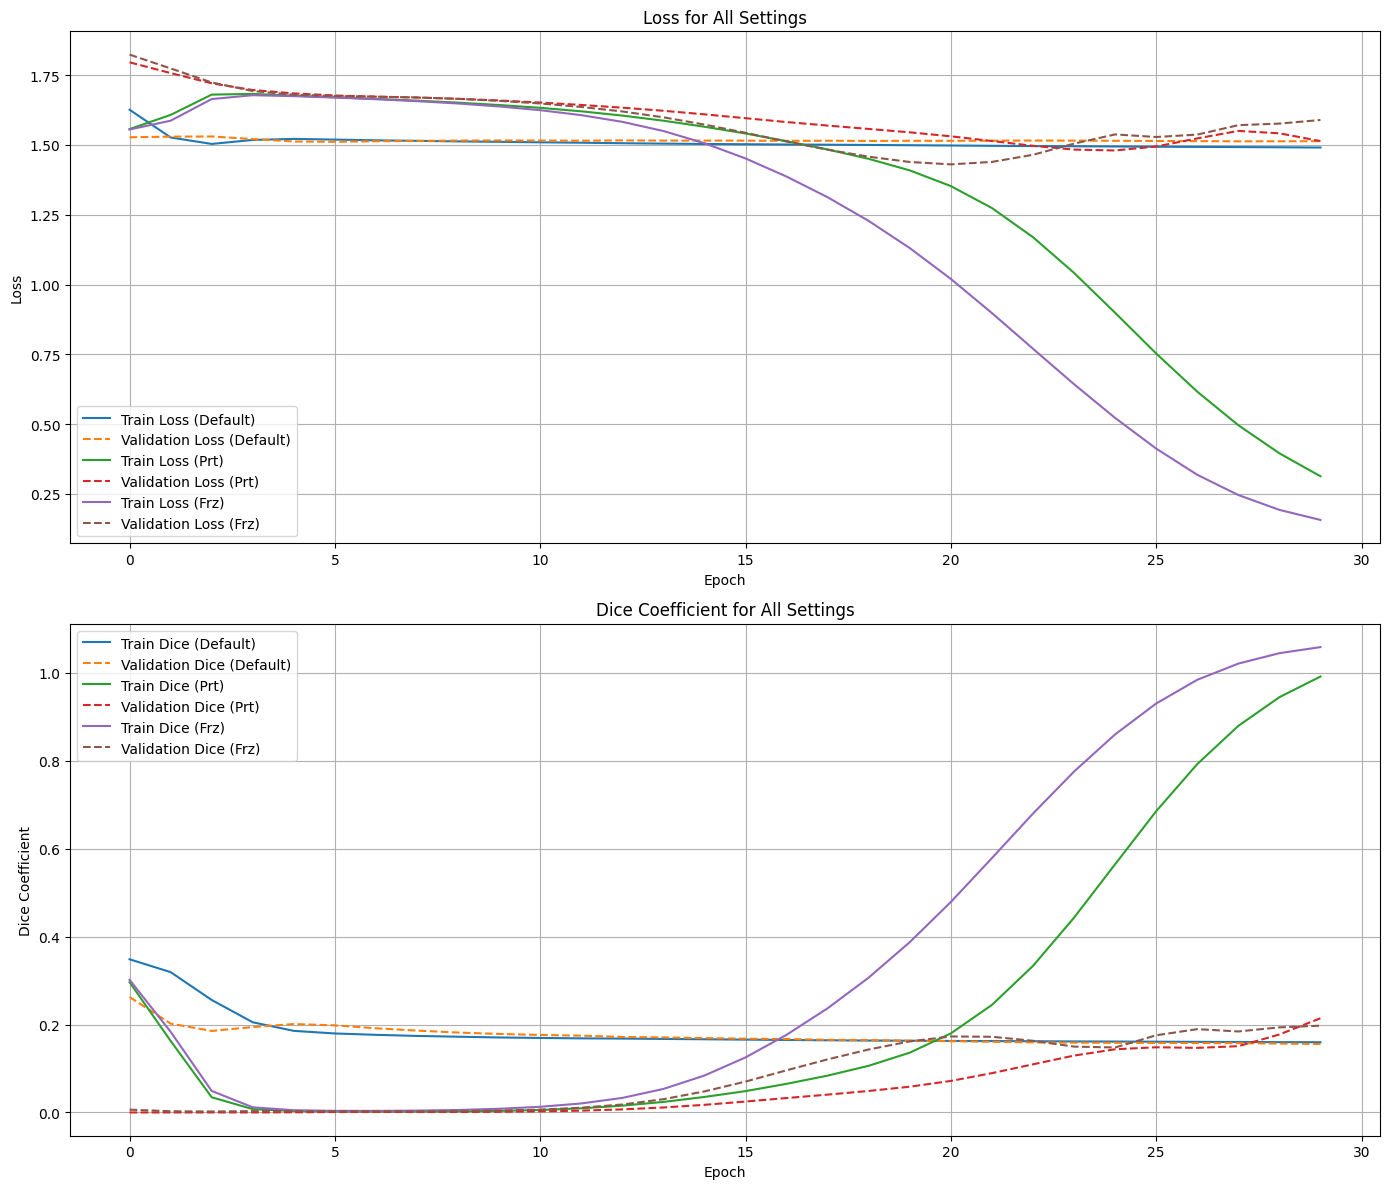

In [218]:
plot_combined_metrics('./summary/training_results_20240511_023708.csv')